<a href="https://colab.research.google.com/github/hashimsayed0/analytics-evaluation/blob/master/Analytics_Evaluation_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1

A customer informed their consultant that they have developed several formulations of petrol
that gives different characteristics of burning pattern. The formulations are obtaining by adding
varying levels of additives that, for example, prevent engine knocking, gum prevention, stability
in storage, and etc. However, a third party certification organisation would like to verify if the
formulations are significantly different, and request for both physical and statistical proof. Since
the formulations are confidential information, they are not named in the dataset.
<br>Please assist the consultant in the area of statistical analysis by doing this;
<br><br>a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include
summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is
a must.

##Importing dataset from github

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/hashimsayed0/analytics-evaluation/master/ingredient.csv')

## Brief descriptive stats about each variable

In [1]:
df.describe()

NameError: ignored

In [48]:
#Type of data in each column
df.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

In [49]:
# Check to see if there are missing values
df.isnull().any()

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
i    False
dtype: bool

##Analysing the distribution of each variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e4e9d7eb8>,
      dtype=object)

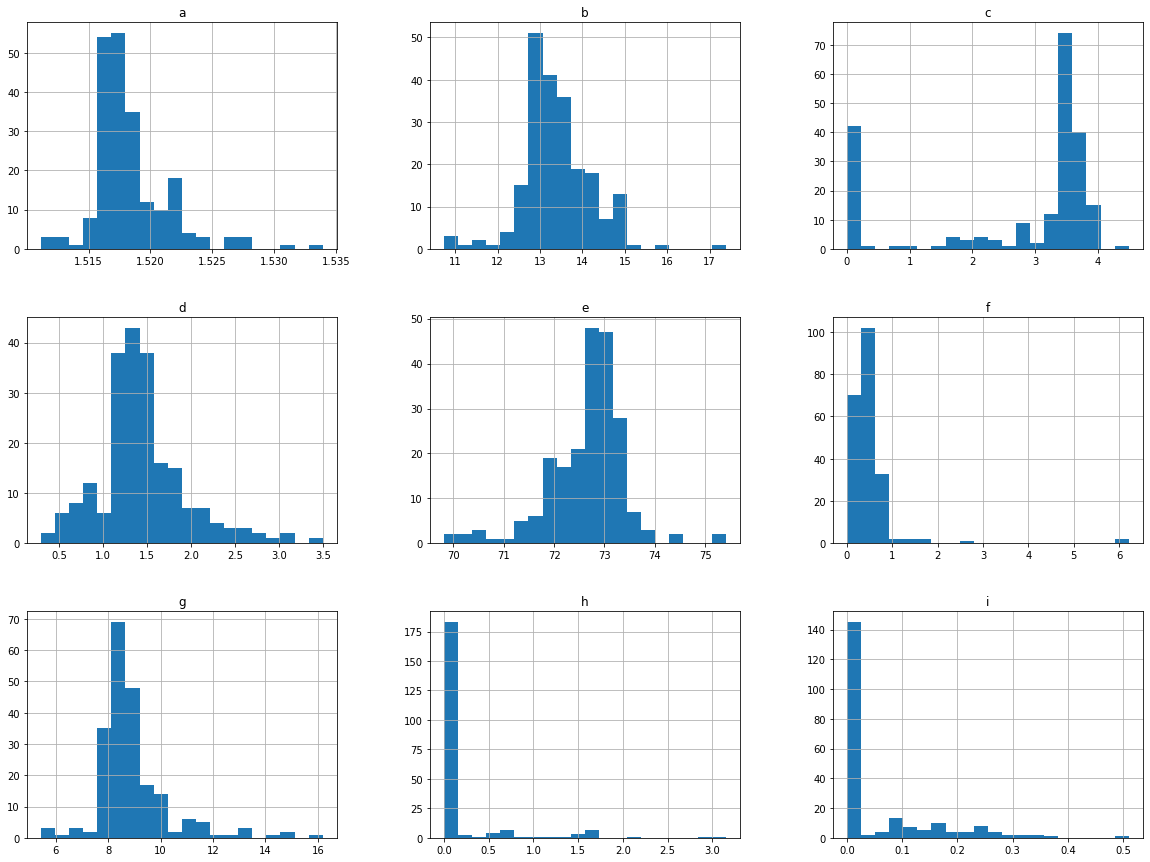

In [50]:
df.hist(bins=20,figsize=(20, 15))

## Correlation

Checking for correlation between variables

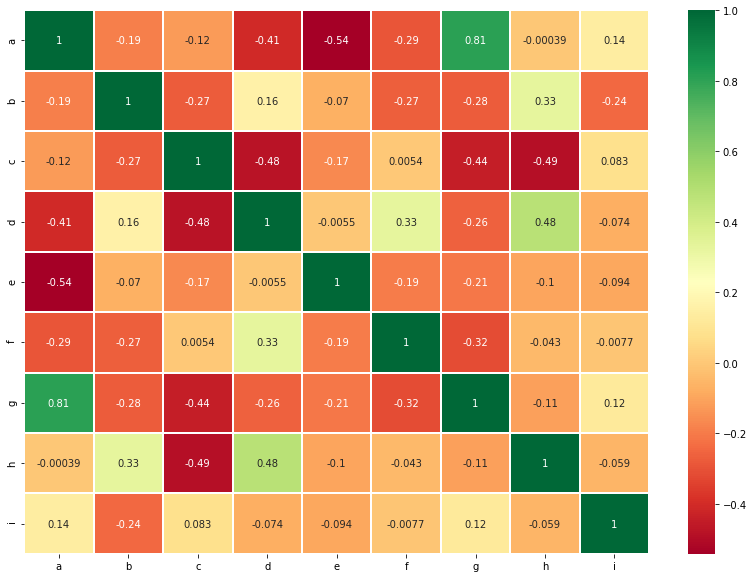

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=1)
fig = plt.gcf()
fig.set_size_inches(14,10)
plt.show()

## Boxplot

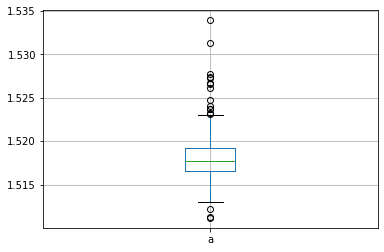

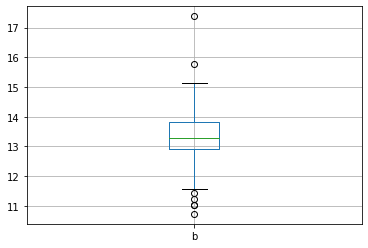

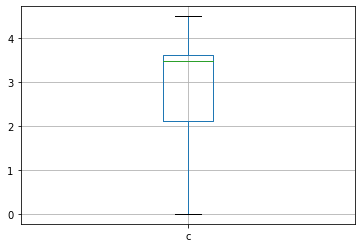

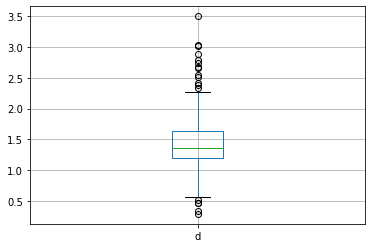

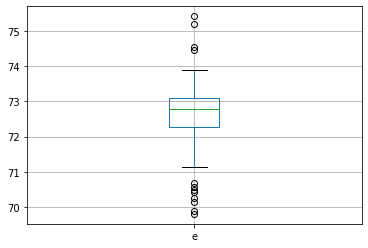

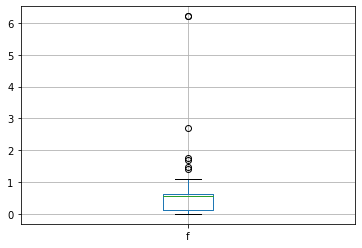

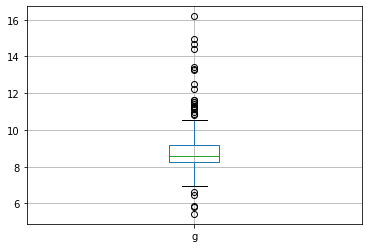

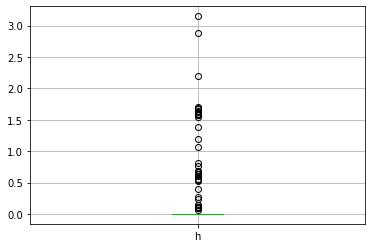

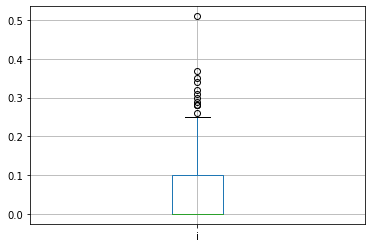

In [55]:
for var in df.columns:
  df.boxplot(column=var)
  plt.show()

##Summary
It can be seen that columns a, b, c, d, e and h are normally distributed while f, h and i are not.

It can also be noted that a & g are highly positively correlated (0.81) and a & e are negatively correlated.

## Clustering Test

Using K-means clustering algorithm

In [57]:
from sklearn.cluster import KMeans
X = df.copy()

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

Choosing a value for k using elbow method

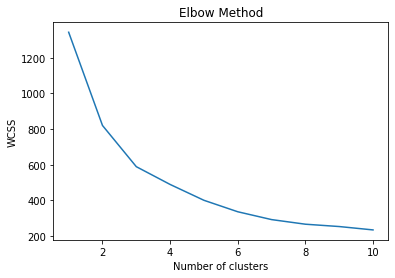

In [58]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It is clear from the graph that increasing k beyond 3 does not decrease within cluster sum of squares (WCSS) by much. Therefore k is chosen as 3.

In [0]:
km = KMeans(n_clusters = 3, random_state=0).fit(X)
pred_y = km.fit_predict(X)

In [0]:
df['cluster'] = pd.DataFrame(pred_y)

In [67]:
df.head()

,a,b,c,d,e,f,g,h,i,cluster
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0


In [68]:
# No of data points belonging to each cluster
df['cluster'].value_counts()

0    162
2     31
1     21
Name: cluster, dtype: int64

### Summary

It looks like there are 3 different types of formulations with 162 of them of type 1, 31 of type 2, and 21 of type 3.